In [197]:
import ee
import geemap
import pandas as pd
from tqdm import tqdm

ee.Initialize()

In [198]:
FEATURES = ['Year', 'Latitude', 'Longitude', 'Area (HA)'] #['Year', 'Area (HA)' , 'Village', 'District', 'State'] #['Year', 'Latitude', 'Longitude', 'Area (HA)']
LABEL = ['Crops']

df = pd.read_csv('farm_survey.csv')

#drop bad coordinates
df = df.drop(df.loc[df.Longitude == df.Latitude].index)

#fix label 
df['Crops'] = df['Crops'].str.lower()
df['Crops'] = df['Crops'].replace('banana-green', 'banana')
df['Crops'] = df['Crops'].replace('binjal', 'brinjal')
df['Crops'] = df['Crops'].replace('bottlegourd', 'bottle gourd')
df['Crops'] = df['Crops'].replace('brinjal green round', 'brinjal')
df['Crops'] = df['Crops'].replace('brinjal green round', 'brinjal')
df['Crops'] = df['Crops'].replace('brinjal purple long round', 'brinjal')
df['Crops'] = df['Crops'].replace('brinjal purple round', 'brinjal')
df['Crops'] = df['Crops'].replace('chillies', 'chilli')
df['Crops'] = df['Crops'].replace('chilly', 'chilli')
df['Crops'] = df['Crops'].replace('cluserbeans', 'clusterbeans')
df['Crops'] = df['Crops'].replace('coriander seed', 'coriander')
df['Crops'] = df['Crops'].replace('foxtile millet', 'foxtail millet')
df['Crops'] = df['Crops'].replace('green chilli', 'chilli')
df['Crops'] = df['Crops'].replace('ladiesfinger', 'okra')
df['Crops'] = df['Crops'].replace('mint including leaves', 'mint')
df['Crops'] = df['Crops'].replace('okra/bhindi', 'okra')
df['Crops'] = df['Crops'].replace('paddy (ir 64)', 'paddy (ir-64)')
df['Crops'] = df['Crops'].replace('pamogranate', 'pomegranate')
df['Crops'] = df['Crops'].replace('pomegranate', 'pomegranate (fresh)')
df['Crops'] = df['Crops'].replace('ragi/finger millet grain', 'ragi')
df['Crops'] = df['Crops'].replace('raw cotton', 'cotton')
df['Crops'] = df['Crops'].replace('redchilly', 'chilli')
df['Crops'] = df['Crops'].replace('snakegourd', 'snake gourd')
df['Crops'] = df['Crops'].replace("Beetroot'", "Beetroot")

df = df.dropna()
df = df.reset_index()

df.head()

,index,Unnamed: 0,Year,Farmer Tracenet code,Village,District,State,Latitude,Longitude,Crops,Area (HA),Estimated yield (MT),geometry,yield
0,55,55,2016,AP0923000027,Enabavi,Jangaon,Telangana,17.657379,79.132052,tomato,0.1,250.0,POINT (79.132052 17.657379),2500.0
1,56,56,2016,AP0923000027,Enabavi,Jangaon,Telangana,17.657379,79.132052,paddy,0.5,15.0,POINT (79.132052 17.657379),30.0
2,57,57,2016,AP0923000028,Enabavi,Jangaon,Telangana,17.657381,79.132054,paddy,0.2,8.0,POINT (79.132054 17.657381),40.0
3,58,58,2016,AP0923000029,Enabavi,Jangaon,Telangana,17.657389,79.132062,paddy,0.5,15.0,POINT (79.132062 17.657389),30.0
4,59,59,2016,AP0929000001,Enabavi,Jangaon,Telangana,17.657354,79.132027,paddy,0.5,15.0,POINT (79.13202699999999 17.657354),30.0


In [199]:
print(df.Crops.unique())
print(df.Crops.nunique())

['tomato' 'paddy' 'brinjal' 'red gram' 'bendi' 'palak' 'chilli' 'lemon'
 'sweet orange' 'foxtail millet' 'groundnut' 'orange' 'varigalu' 'banana'
 'barigalu' 'sweet' 'sugarcane' 'garlic' 'onion' 'jowar' 'carrot'
 'sunflower' 'cabbage' 'radish' "beetroot'" 'bitter gourd' 'bottle gourd'
 'spinach' 'coriander' 'amaranthus' 'ridge gourd' 'chikkudu' 'leafy'
 'paddy (bpt)' 'paddy (ir-64)' 'green gram' 'maize' 'finger millet'
 'mango' 'cashew' 'ragi' 'horse gram' 'cumin' 'mustard'
 'pomegranate (fresh)' 'paddy-sona masuri' 'brinjal purple long'
 'non-basmati paddy' 'cotton' 'okra' 'vacant' 'sorghum' 'urad'
 'bengal gram' 'red onion' 'black sesame' 'proso millet' 'sesame'
 'shahi jeera/cumin' 'cumin whole' 'mint' 'clusterbeans' 'keera' 'dosa'
 'donda' 'guava' 'sweetcorn' 'menthi' 'ginger' 'snake gourd' 'blackgram'
 'andukorra' 'papaya']
73


In [231]:
drop_classes = df.Crops.value_counts().index[(df.Crops.value_counts()/len(df.Crops) < 0.01)]

df.Crops.loc[df.Crops.isin(drop_classes)] = 'other'

df['Crops'] = df['Crops'].replace("sweet orange", "other")

/home/eesjb/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [201]:
print(df.Crops.unique())
print(df.Crops.nunique())

['tomato' 'paddy' 'brinjal' 'red gram' 'other' 'lemon' 'sweet orange'
 'foxtail millet' 'groundnut' 'banana' 'onion' 'ridge gourd' 'paddy (bpt)'
 'green gram' 'paddy-sona masuri' 'non-basmati paddy' 'okra' 'sesame'
 'blackgram']
19


<AxesSubplot:>

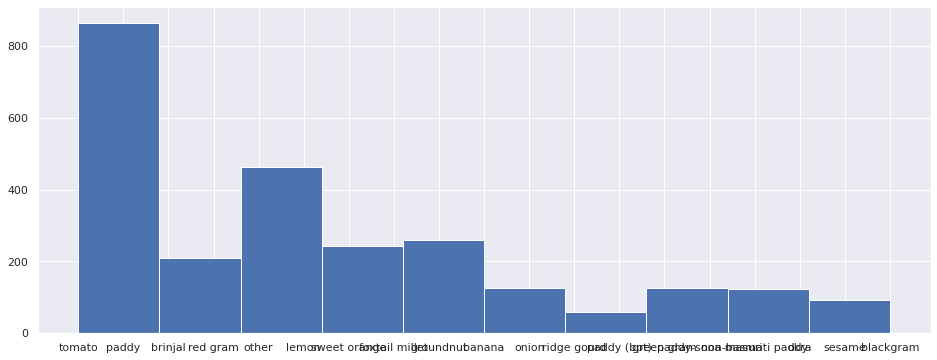

In [202]:
plt.figure(figsize=(16,6))
df.Crops.hist()

In [203]:
features = []
years = []
lats = []
lngs = []

for _, (lat, lng, year) in df[['Latitude', 'Longitude', 'Year']].iterrows():
    feat = ee.Feature(ee.Geometry.Point((lng, lat)))
    features.append(feat)
    years.append(int(year))
    lats.append(lat)
    lngs.append(lng)
    
fromList = ee.FeatureCollection(features)

In [204]:
Map = geemap.Map()
Map.addLayer(fromList)
Map.centerObject(fromList)
Map

Map(center=[16.030053401365763, 79.62985473755845], controls=(WidgetControl(options=['position'], widget=HBox(…

In [205]:
mean_reducer = ee.Reducer.mean()
minmax_reducer = ee.Reducer.minMax()
    
bdod_mean = ee.Image("projects/soilgrids-isric/bdod_mean")
cec_mean = ee.Image("projects/soilgrids-isric/cec_mean")
cfvo_mean = ee.Image("projects/soilgrids-isric/cfvo_mean")
clay_mean = ee.Image("projects/soilgrids-isric/clay_mean")
nitrogen_mean = ee.Image("projects/soilgrids-isric/nitrogen_mean")
ocd_mean = ee.Image("projects/soilgrids-isric/ocd_mean")
ocs_mean = ee.Image("projects/soilgrids-isric/ocs_mean")
phh2o_mean = ee.Image("projects/soilgrids-isric/phh2o_mean")
sand_mean = ee.Image("projects/soilgrids-isric/sand_mean")
silt_mean = ee.Image("projects/soilgrids-isric/silt_mean")
soc_mean = ee.Image("projects/soilgrids-isric/soc_mean")
    
era5_monthly = ee.ImageCollection("ECMWF/ERA5_LAND/MONTHLY") 

soil_feats = {'bulk density': bdod_mean,
             'cation exchange capacity': cec_mean,
             'coarse fragments': cfvo_mean,
             'clay': clay_mean,
             'total nitrogen': nitrogen_mean,
             'organic carbon density': ocd_mean,
             'organic carbon stock': ocs_mean,
             'pH in H2O': phh2o_mean,
             'sand': sand_mean,
             'silt': silt_mean,
             'soil organic carbon': soc_mean}
    
soil_dfs = []
for feat in tqdm(soil_feats):
    image = soil_feats[feat]
    # Use the combined reducer to get the mean and SD of the image.
    soil_stats = image.reduceRegions(**{
      'reducer': mean_reducer,
      'collection': fromList,
    })
    
    soil_stats_df = geemap.ee_to_pandas(soil_stats)
    
    soil_dfs.append(soil_stats_df)

100%|██████████| 11/11 [00:17<00:00,  1.63s/it]


In [206]:
era5_dfs = []

for y in tqdm(range(2016, 2021)):
    for m in range(1,13):
        print(y, m)
        
        era5_monthly_sel = era5_monthly \
                .filter(ee.Filter.calendarRange(2020,2020,'year')) \
                .filter(ee.Filter.calendarRange(1,1,'month')).first()


        # Use the combined reducer to get the mean and SD of the image.
        era5_stats = era5_monthly_sel.reduceRegions(**{
          'reducer': minmax_reducer,
          'collection': fromList,
        })
        
        era5_stats_df = geemap.ee_to_pandas(era5_stats)
    
        era5_stats_df.columns += f'_{y}_{m}'

        era5_dfs.append(era5_stats_df)

  0%|          | 0/5 [00:00<?, ?it/s]

2016 1
2016 2
2016 3
2016 4
2016 5
2016 6
2016 7
2016 8
2016 9
2016 10
2016 11
2016 12


 20%|██        | 1/5 [00:37<02:28, 37.25s/it]

2017 1
2017 2
2017 3
2017 4
2017 5
2017 6
2017 7
2017 8
2017 9
2017 10
2017 11
2017 12


 40%|████      | 2/5 [01:15<01:54, 38.04s/it]

2018 1
2018 2
2018 3
2018 4
2018 5
2018 6
2018 7
2018 8
2018 9
2018 10
2018 11
2018 12


 60%|██████    | 3/5 [01:53<01:15, 37.72s/it]

2019 1
2019 2
2019 3
2019 4
2019 5
2019 6
2019 7
2019 8
2019 9
2019 10
2019 11
2019 12


 80%|████████  | 4/5 [02:33<00:38, 38.86s/it]

2020 1
2020 2
2020 3
2020 4
2020 5
2020 6
2020 7
2020 8
2020 9
2020 10
2020 11
2020 12


100%|██████████| 5/5 [03:13<00:00, 38.60s/it]


In [207]:
soil_data_df = pd.concat(soil_dfs, axis=1)
era5_data_df = pd.concat(era5_dfs, axis=1)

joined = pd.concat([df[FEATURES+LABEL], soil_data_df, era5_data_df], axis=1)
#joined=joined.dropna()
joined

#NOW TO FIX ERA5 WITH A BODGE

,Year,Latitude,Longitude,Area (HA),Crops,bdod_0-5cm_mean,bdod_100-200cm_mean,bdod_15-30cm_mean,bdod_30-60cm_mean,bdod_5-15cm_mean,...,v_component_of_wind_10m_max_2020_12,v_component_of_wind_10m_min_2020_12,volumetric_soil_water_layer_1_max_2020_12,volumetric_soil_water_layer_1_min_2020_12,volumetric_soil_water_layer_2_max_2020_12,volumetric_soil_water_layer_2_min_2020_12,volumetric_soil_water_layer_3_max_2020_12,volumetric_soil_water_layer_3_min_2020_12,volumetric_soil_water_layer_4_max_2020_12,volumetric_soil_water_layer_4_min_2020_12
0,2016,17.657379,79.132052,0.10,tomato,151.0,159.0,153.0,156.0,154.0,...,0.544175,0.544175,0.194733,0.194733,0.226151,0.226151,0.283264,0.283264,0.337433,0.337433
1,2016,17.657379,79.132052,0.50,paddy,151.0,159.0,153.0,156.0,154.0,...,0.544175,0.544175,0.194733,0.194733,0.226151,0.226151,0.283264,0.283264,0.337433,0.337433
2,2016,17.657381,79.132054,0.20,paddy,151.0,159.0,153.0,156.0,154.0,...,0.544175,0.544175,0.194733,0.194733,0.226151,0.226151,0.283264,0.283264,0.337433,0.337433
3,2016,17.657389,79.132062,0.50,paddy,151.0,159.0,153.0,156.0,154.0,...,0.544175,0.544175,0.194733,0.194733,0.226151,0.226151,0.283264,0.283264,0.337433,0.337433
4,2016,17.657354,79.132027,0.50,paddy,151.0,159.0,153.0,156.0,154.0,...,0.544175,0.544175,0.194733,0.194733,0.226151,0.226151,0.283264,0.283264,0.337433,0.337433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2567,2020,17.391707,79.083663,0.50,tomato,139.0,154.0,147.0,151.0,145.0,...,0.485581,0.485581,0.191574,0.191574,0.203568,0.203568,0.263687,0.263687,0.282013,0.282013
2568,2020,17.374320,79.101371,0.96,paddy,141.0,156.0,148.0,152.0,147.0,...,0.485581,0.485581,0.191574,0.191574,0.203568,0.203568,0.263687,0.263687,0.282013,0.282013
2569,2020,17.374320,79.101371,0.50,red gram,141.0,156.0,148.0,152.0,147.0,...,0.485581,0.485581,0.191574,0.191574,0.203568,0.203568,0.263687,0.263687,0.282013,0.282013
2570,2020,17.374320,79.101371,2.00,other,141.0,156.0,148.0,152.0,147.0,...,0.485581,0.485581,0.191574,0.191574,0.203568,0.203568,0.263687,0.263687,0.282013,0.282013


In [208]:
import numpy as np

data = []

for _, row in tqdm(joined.iterrows()):   
    non_era5_cols = list(set(joined.columns) - set(era5_data_df.columns))
    if np.isnan(row.Year):
        continue
    y = str(int(row.Year))

    sel_era5_cols_row = [col for col in era5_data_df.columns if y in col]
    new_cols = [item.replace(f'_{y}','') for item in sel_era5_cols_row]
    
    #new_df[non_era5_cols] = row[non_era5_cols].values
    #new_df[new_cols] = row[sel_era5_cols_row]
    
    data.append( row[non_era5_cols].values.tolist() + row[sel_era5_cols_row].values.tolist() )

all_df_new = pd.DataFrame(data, columns=non_era5_cols+new_cols)

2572it [00:12, 212.58it/s]


In [209]:
is_NaN = all_df_new.isnull()
row_has_NaN = is_NaN.any(axis=1)
all_df_new[row_has_NaN]

,mean,phh2o_60-100cm_mean,ocd_100-200cm_mean,cfvo_60-100cm_mean,sand_30-60cm_mean,cfvo_30-60cm_mean,silt_100-200cm_mean,nitrogen_30-60cm_mean,cfvo_0-5cm_mean,nitrogen_5-15cm_mean,...,v_component_of_wind_10m_max_12,v_component_of_wind_10m_min_12,volumetric_soil_water_layer_1_max_12,volumetric_soil_water_layer_1_min_12,volumetric_soil_water_layer_2_max_12,volumetric_soil_water_layer_2_min_12,volumetric_soil_water_layer_3_max_12,volumetric_soil_water_layer_3_min_12,volumetric_soil_water_layer_4_max_12,volumetric_soil_water_layer_4_min_12
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.363999,0.363999,0.314026,0.314026,0.321213,0.321213,0.343582,0.343582,0.283859,0.283859
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.363999,0.363999,0.314026,0.314026,0.321213,0.321213,0.343582,0.343582,0.283859,0.283859
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.363999,0.363999,0.314026,0.314026,0.321213,0.321213,0.343582,0.343582,0.283859,0.283859
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.363999,0.363999,0.314026,0.314026,0.321213,0.321213,0.343582,0.343582,0.283859,0.283859
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.363999,0.363999,0.314026,0.314026,0.321213,0.321213,0.343582,0.343582,0.283859,0.283859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,33.0,75.0,43.0,204.0,343.0,179.0,247.0,580.0,145.0,971.0,...,0.528550,0.528550,0.128586,0.128586,0.200439,0.200439,0.267624,0.267624,0.212860,0.212860
2456,29.0,74.0,43.0,162.0,328.0,134.0,268.0,566.0,111.0,1060.0,...,0.528550,0.528550,0.128586,0.128586,0.200439,0.200439,0.267624,0.267624,0.212860,0.212860
2457,31.0,75.0,40.0,150.0,343.0,123.0,254.0,558.0,107.0,958.0,...,0.528550,0.528550,0.128586,0.128586,0.200439,0.200439,0.267624,0.267624,0.212860,0.212860
2474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.363999,0.363999,0.314026,0.314026,0.321213,0.321213,0.343582,0.343582,0.283859,0.283859


In [210]:
all_df_new = all_df_new.dropna()

In [211]:
all_df_new.Year = all_df_new.Year.astype(int)

In [212]:
SOIL_FEATS = soil_data_df.columns.tolist()#[x for x in all_df_new.columns if '_mean' in x]

In [213]:
ERA5_FEATS = new_cols

In [233]:
X = all_df_new[FEATURES + SOIL_FEATS + ERA5_FEATS]
del X['Latitude']
del X['Longitude']

y_pre = all_df_new['Crops'].str.lower()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y_pre)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced').fit(X_train, y_train)
rf_pred= rf.score(X_test, y_test)

print("Training score: {:.3f}".format(rf.score(X_train, y_train)))
print("Test score: {:.3f}".format(rf.score(X_test, y_test)))

Training score: 0.834
Test score: 0.481


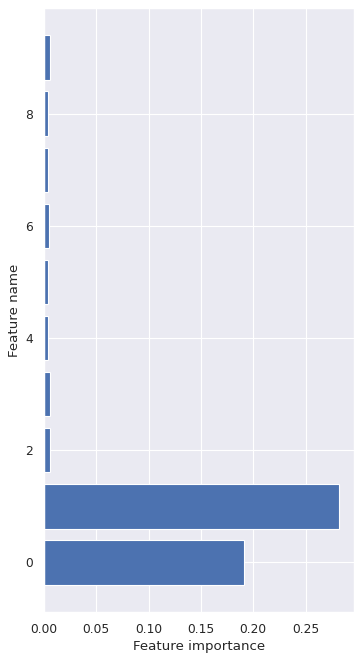

In [215]:
import matplotlib.pyplot as plt
import numpy as np

max_n = 10
plt.figure(figsize=(5,10), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features)[:max_n], rf.feature_importances_[:max_n])
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
#plt.yticks(np.arange(max_n), X_train.columns)
plt.show()

In [329]:
random_ind = np.random.choice(len(X_test))

prob = rf.predict_proba(X_test.iloc[random_ind].values.reshape(1,-1))

In [330]:
le.inverse_transform(list(range(len(prob[0]))))

array(['banana', 'blackgram', 'brinjal', 'foxtail millet', 'green gram',
       'groundnut', 'lemon', 'non-basmati paddy', 'okra', 'onion',
       'other', 'paddy', 'paddy (bpt)', 'paddy-sona masuri', 'red gram',
       'ridge gourd', 'sesame', 'tomato'], dtype=object)

In [331]:
prob

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.65, 0.  , 0.  , 0.  , 0.34, 0.  ,
        0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ]])

In [332]:
prob.argmax()

5

In [333]:
y_test[random_ind]

5

In [334]:
rf_predict = rf.predict(X_test.iloc[random_ind].values.reshape(1,-1))[0]
rf_predict

5

In [335]:
le.inverse_transform([prob.argmax(), y_test[random_ind], rf_predict])

array(['groundnut', 'groundnut', 'groundnut'], dtype=object)

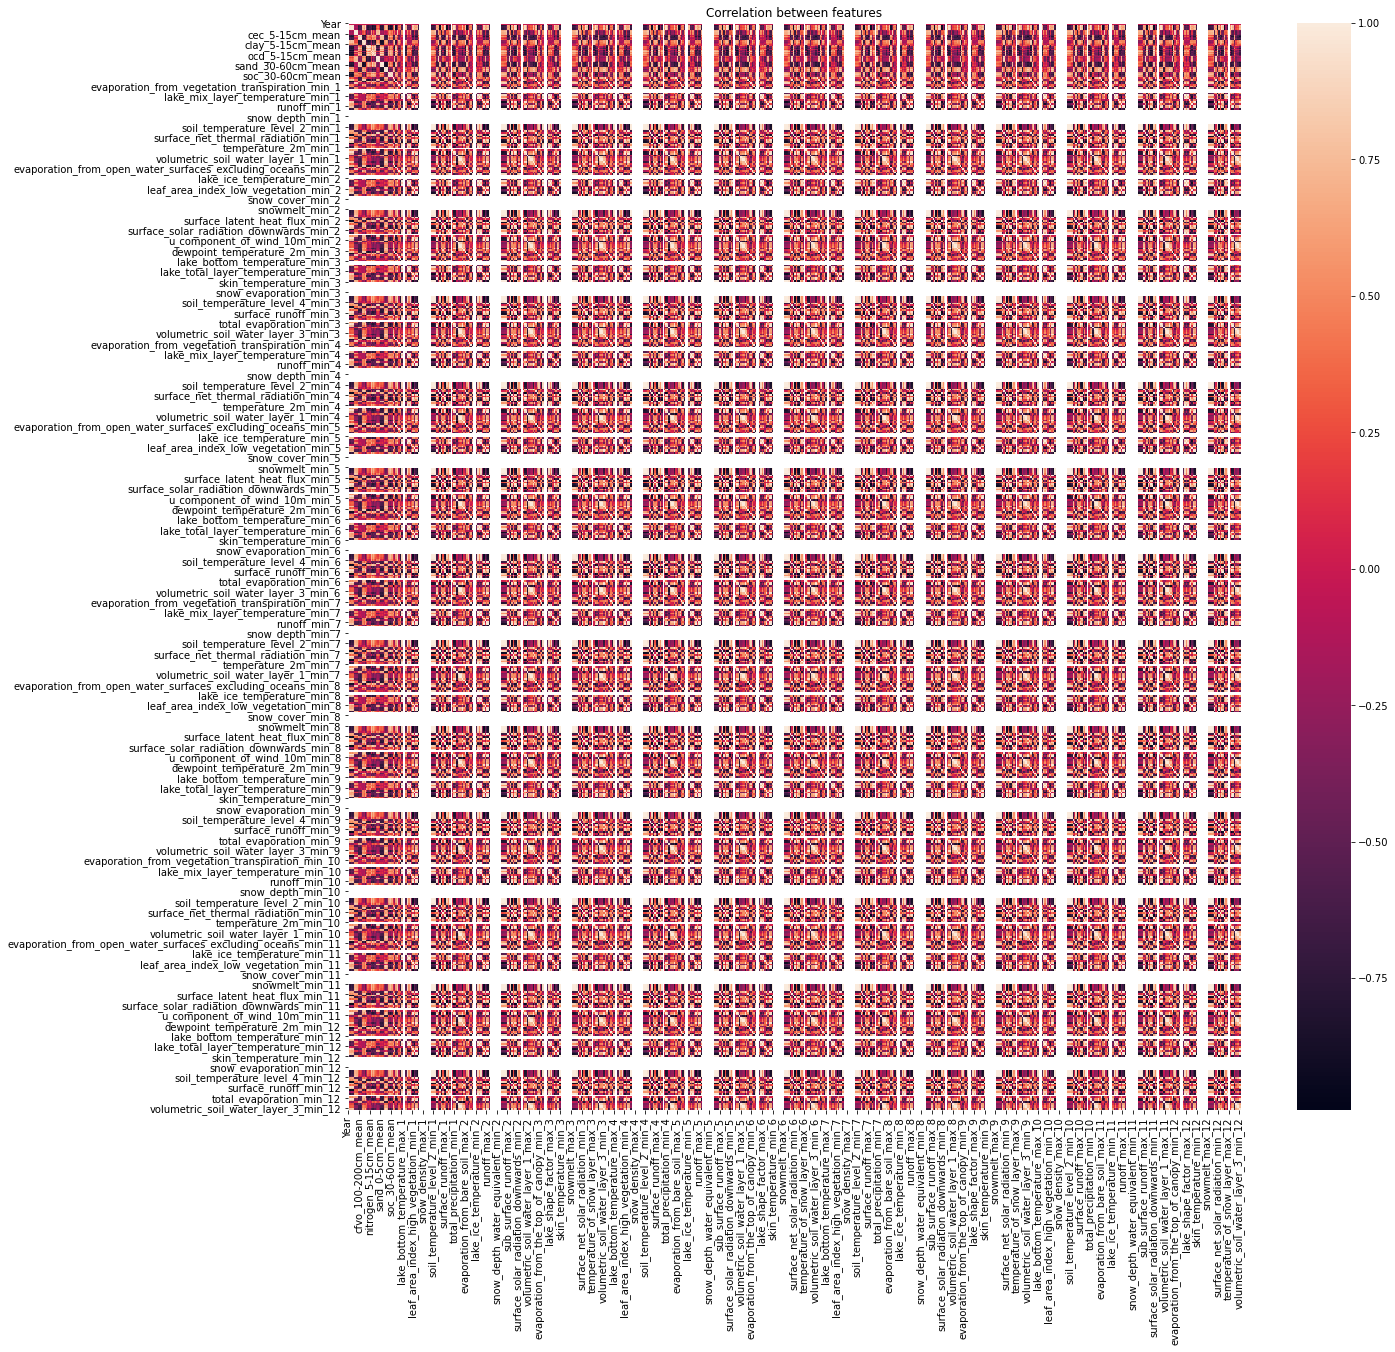

In [36]:
import seaborn as sns

plt.figure(figsize=(20,20))
plt.title("Correlation between features")
corr = X[:100].corr()
sns.heatmap(corr)
plt.show()

In [280]:
sns.pairplot(all_df_new[:10], hue='Crops')

KeyboardInterrupt: 

ValueError: Image size of 227700x227700 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 227700x227700 with 343 Axes>

<Figure size 864x864 with 0 Axes>

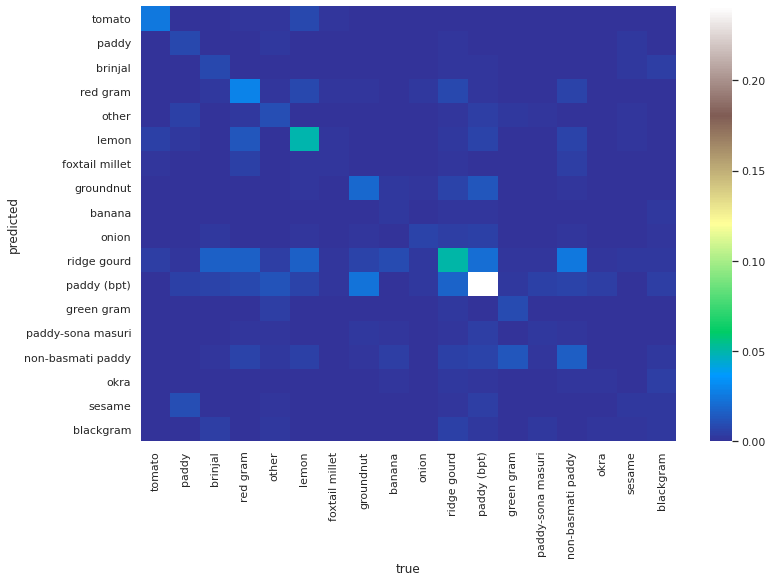

In [256]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(12,12))
mat = confusion_matrix(y_test,rf.predict(X_test), normalize='all')

targets = range(len(np.unique(y_train)))
df_cm = pd.DataFrame(mat, df.Crops.unique(), df.Crops.unique())
sns.set(font_scale=1.0) # for label size
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=False, annot_kws={"size": 12},cmap="terrain")
plt.xlabel('true'); plt.ylabel('predicted')
plt.savefig('conf_matrix.png', transparent=True, bbox_inches='tight', dpi=300)

In [257]:
import sklearn.metrics

y_true = y_test
y_pred = rf.predict(X_test)
sklearn.metrics.accuracy_score(y_true, y_pred)

0.48055207026348806

In [271]:
labels = le.inverse_transform(list(range(18)))

In [272]:
print(sklearn.metrics.classification_report(y_true, y_pred, target_names=labels))

                   precision    recall  f1-score   support

           banana       0.71      0.69      0.70        29
        blackgram       0.24      0.55      0.33        11
          brinjal       0.19      0.46      0.27        13
   foxtail millet       0.35      0.48      0.41        48
       green gram       0.24      0.36      0.29        22
        groundnut       0.51      0.57      0.54        69
            lemon       0.17      0.09      0.12        11
non-basmati paddy       0.35      0.43      0.38        35
             okra       0.12      0.33      0.18         6
            onion       0.42      0.28      0.33        18
            other       0.45      0.28      0.34       145
            paddy       0.77      0.70      0.74       273
      paddy (bpt)       0.32      0.58      0.41        12
paddy-sona masuri       0.18      0.17      0.17        12
         red gram       0.22      0.24      0.23        50
      ridge gourd       0.17      0.11      0.13       

In [49]:
mat.shape

(60, 60)

In [274]:
from sklearn.calibration import calibration_curve
y_true = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])
y_pred = np.array([0.1, 0.2, 0.3, 0.4, 0.65, 0.7, 0.8, 0.9,  1.])
prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=3)
prob_true

prob_pred


array([0.2 , 0.53, 0.85])

In [279]:
rf_prediction = rf.predict_proba(X_test)
rf_y, rf_x = calibration_curve(y_test, rf_prediction[:,1], n_bins=10)

fig, ax = plt.subplots()
# only these two lines are calibration curves
#plt.plot(logreg_x,logreg_y, marker='o', linewidth=1, label='logreg')
plt.plot(rf_x, rf_y, marker='o', linewidth=1, label='rf')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for Titanic data')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

ValueError: Only binary classification is supported. Provided labels [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17].

In [337]:
import pickle

with open("clf.pkl", "wb") as out: 
    pickle.dump(rf, out)